Required packets

In [3]:
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd
from sklearn.linear_model import LinearRegression
from scipy.stats import yeojohnson

## Prepare the dataset

Load the dataset and retrieve header and time

Dataset does not contain NaN values


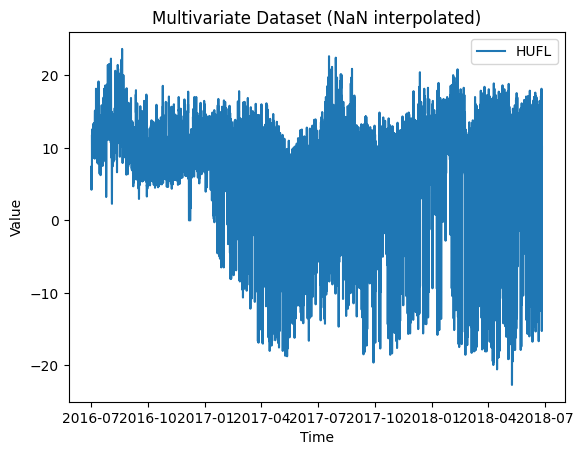

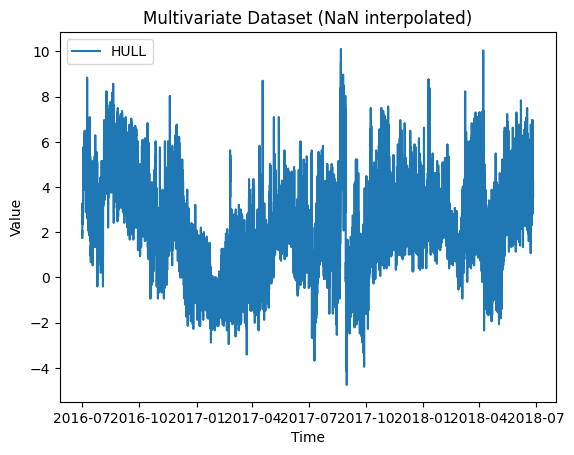

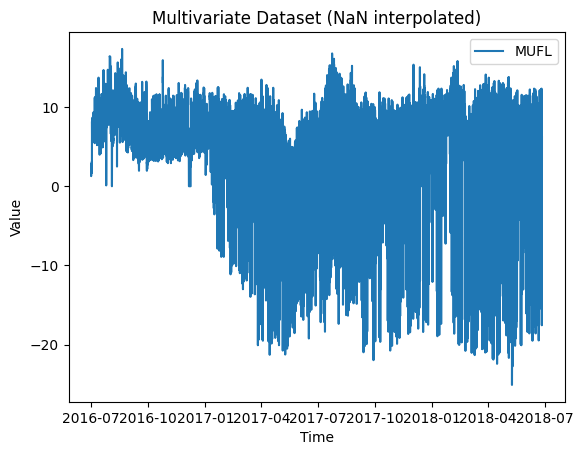

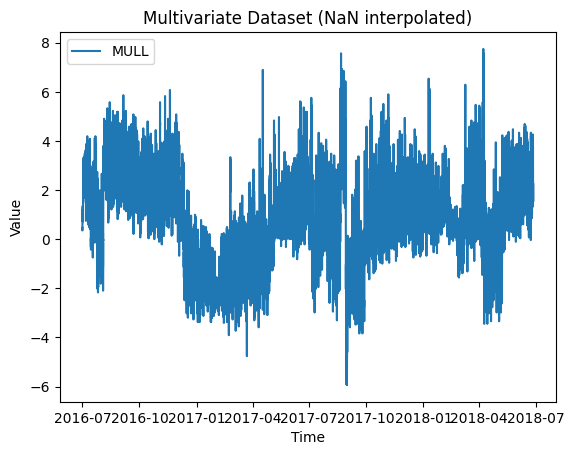

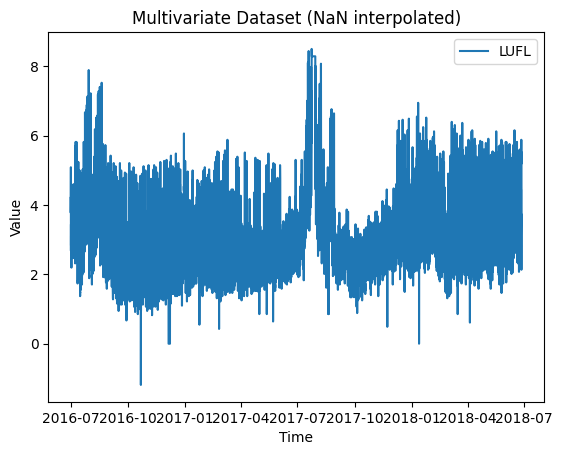

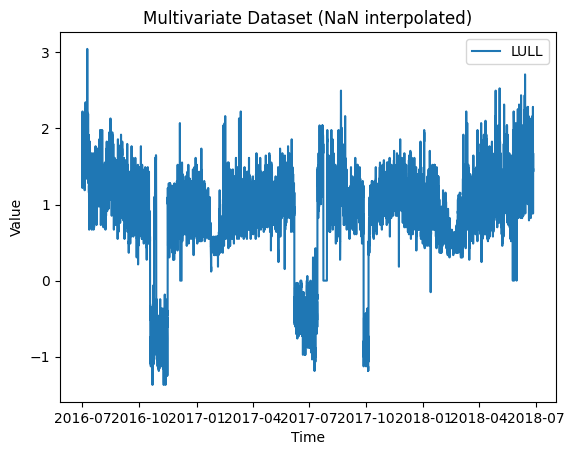

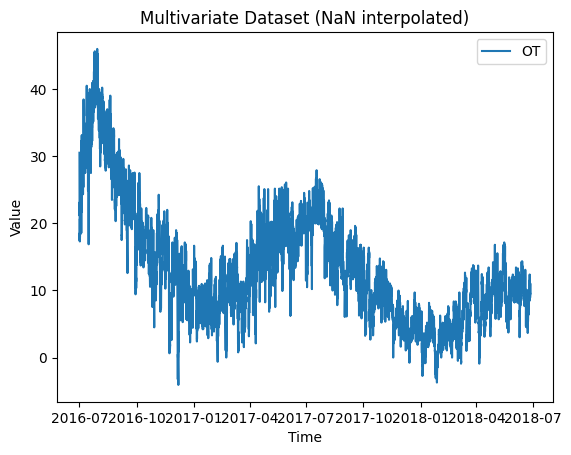

In [4]:
#date_parser = lambda x: to_datetime(x, format="%Y/%m/%d")
series = pd.read_csv('../dataset/ETT/ETTh1.csv', header=0, index_col=0, parse_dates=True)

# Check for NaN values
nan_check = series.isna().any().any()

if nan_check:
    print("Dataset contains NaN values")
    upsampled= series.resample('D').mean()
    series = upsampled.interpolate(method = 'linear')
else:
    print("Dataset does not contain NaN values")

# Retrieve the header (column names) from the original DataFrame
header = series.columns.tolist()

# Create a time index for the entire period
time_index = series.index

# Plot each variable separately
for column in series.columns:
    plt.plot(time_index, series[column], label=column)

    plt.title("Multivariate Dataset (NaN interpolated)")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.legend()
    plt.show()

Remove the change in variance, remove the trend.

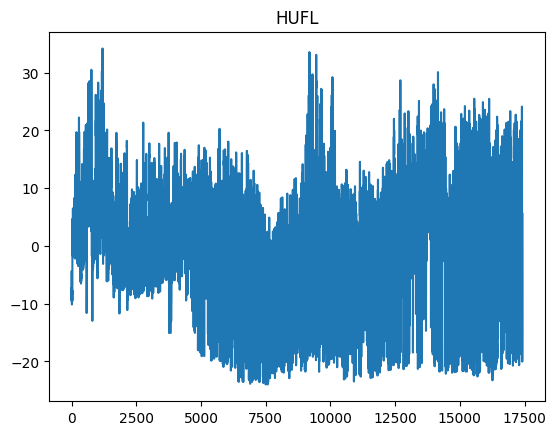

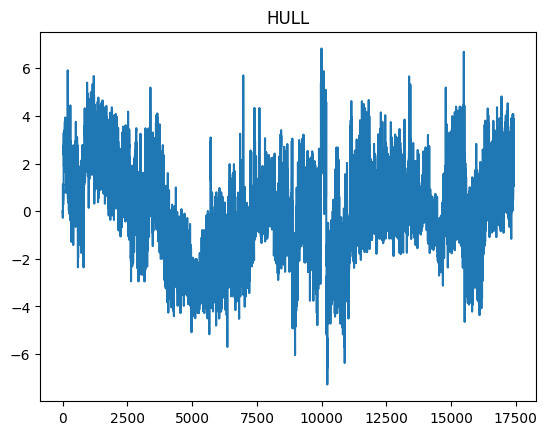

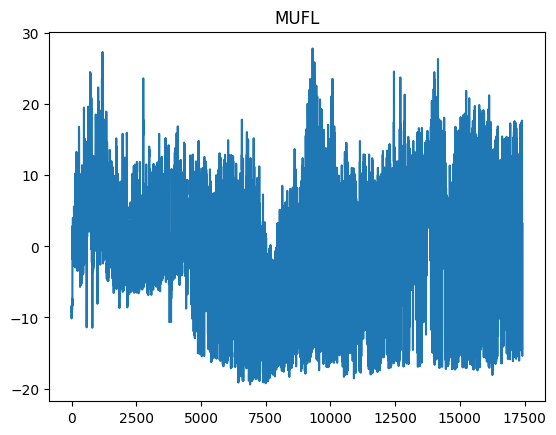

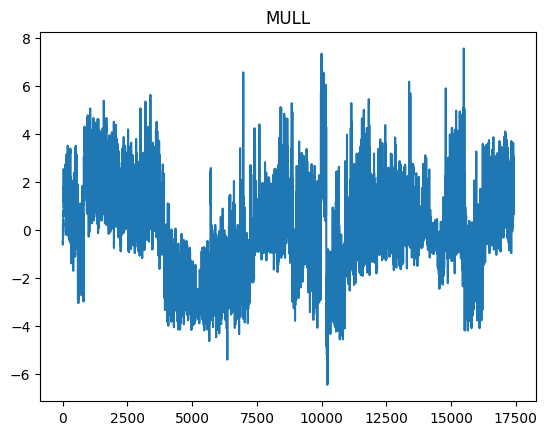

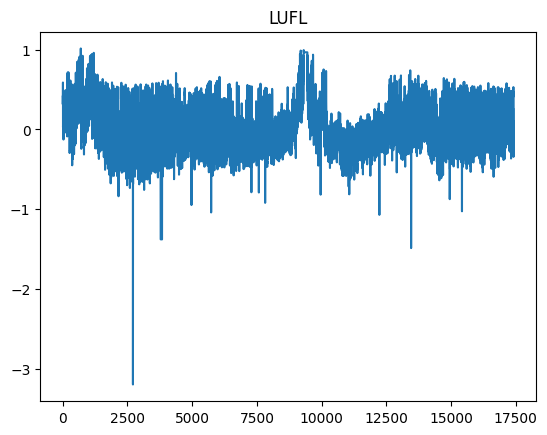

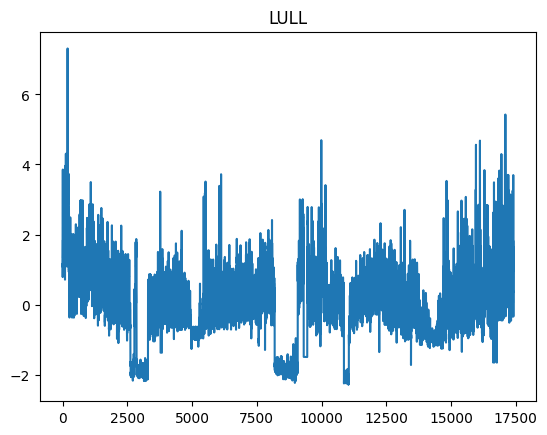

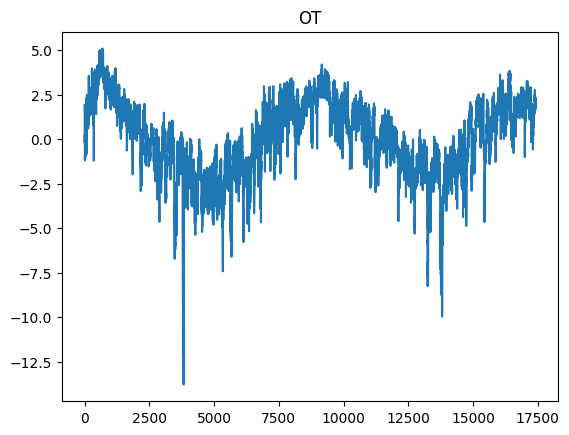

In [5]:
final_series = {}
for column in series.columns:
  X = series[column].values
  xt, _ = yeojohnson(X)
  model = LinearRegression()
  y = np.array([x for x in range(0, len(xt))])
  model.fit(y.reshape(-1, 1), xt)
  pred = model.predict(y.reshape(-1, 1))
  detrend = xt - pred

  # Plot
  plt.plot(detrend)
  plt.title(column)
  plt.show()

  # Scale
  scaler = MinMaxScaler(feature_range=(-1, 1)) # Scale the values between -1 and 1
  time_series_scaled = scaler.fit_transform(detrend.reshape(-1, 1)).flatten()

  final_series[column] = time_series_scaled

Create a new dataset

In [6]:
df = DataFrame(data = final_series, index = time_index, columns = header)
df.to_csv('series_normalized.csv')

Plot

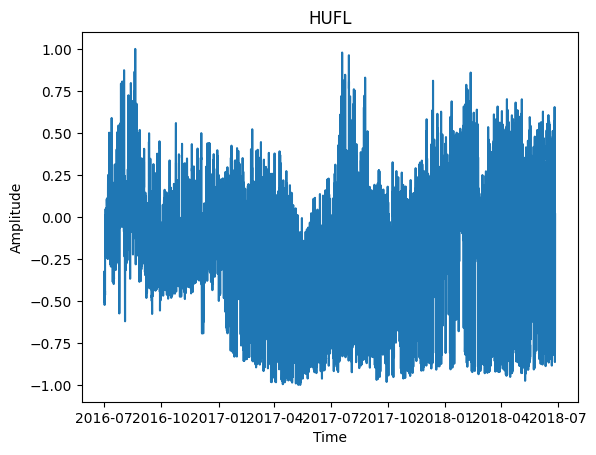

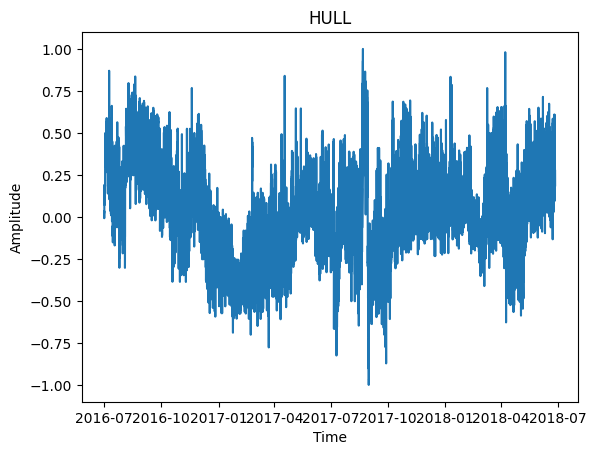

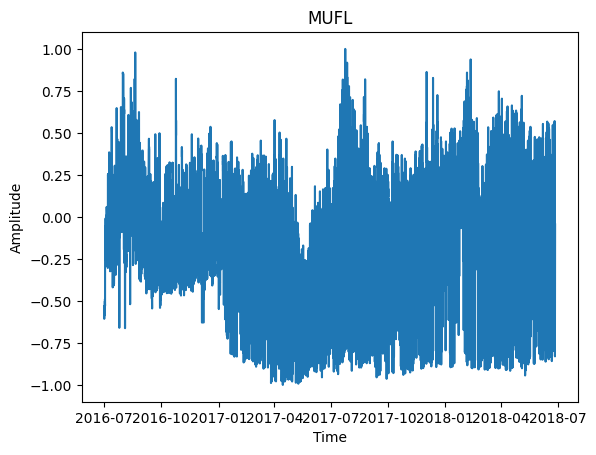

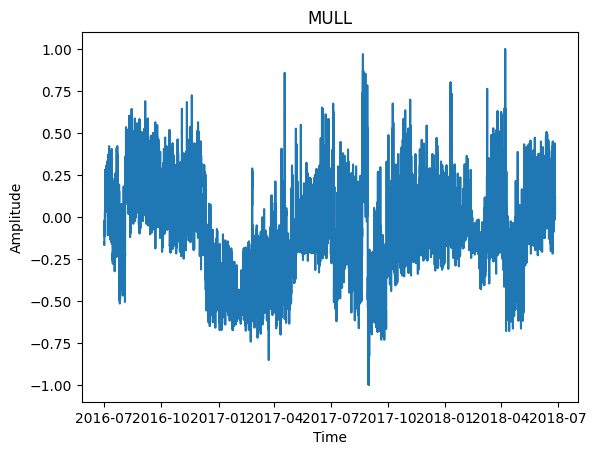

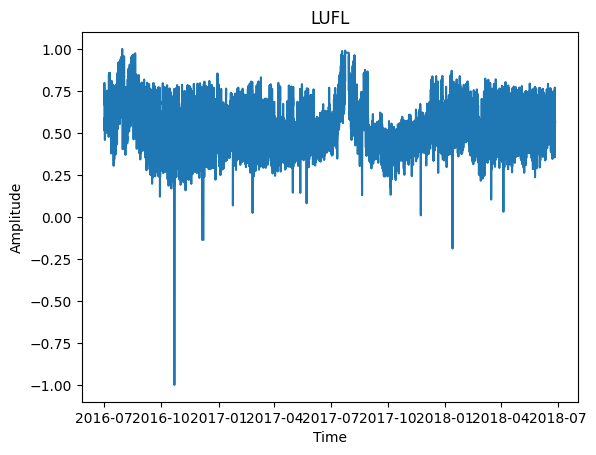

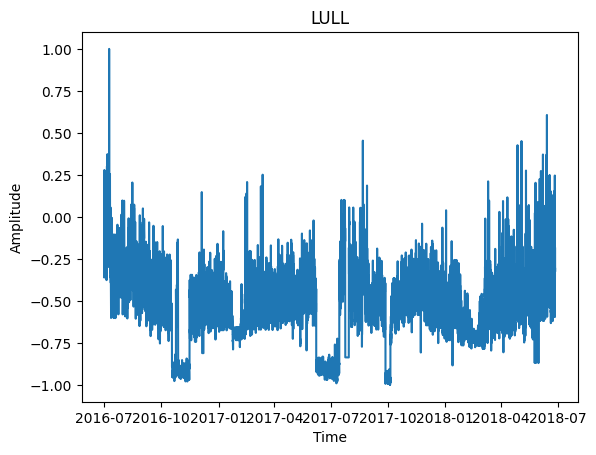

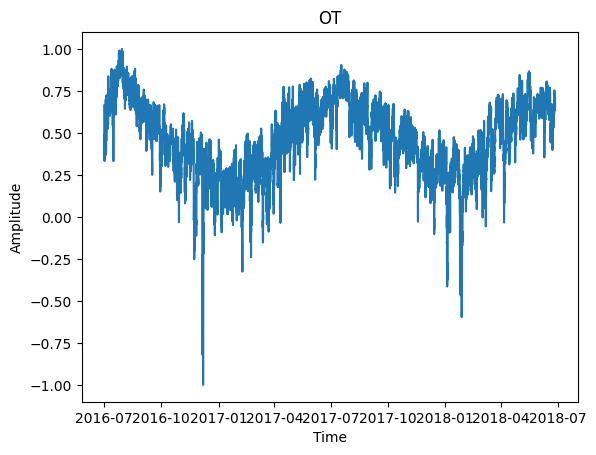

In [7]:
for column in header:
  plt.plot(time_index, final_series[column])
  plt.title(column)
  plt.xlabel('Time')
  plt.ylabel('Amplitude')
  plt.show()